In [1]:
# Importing all the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Load dataset
train_df = pd.read_csv(r'D:\my project\sign_mnist_train\sign_mnist_train.csv')
test_df = pd.read_csv(r'D:\my project\sign_mnist_test\sign_mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
train_df['label'].value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

In [6]:
train_df.shape

(27455, 785)

In [7]:
test_df.shape

(7172, 785)

In [8]:
# Separate features and labels from the training set
# Drop the 'label' column to find features and convert it to NumPy array

X_train = train_df.drop('label', axis=1).values

# Select the 'label' column to get labels and convert it to NumPy array

y_train = train_df['label'].values

# Separate features and labels from the test set
# Drop the 'label' column to find features and convert it to NumPy array

X_test = test_df.drop('label', axis=1).values

# Select the 'label' column to get labels and convert it to NumPy array

y_test = test_df['label'].values


# printing first 5 rows of training feature
print("first 5 rows of X_train:")
print(X_train[:5])

# printing first 5 labels of training feature 
print("first 5 labels of y_train:")
print(y_train[:5])

# printing first 5 rows of test feature
print("first 5 rows of X_test:")
print(X_test[:5])

# printing first 5 labels of test features
print("first 5 labels of y_test:")
print(y_test[:5])

first 5 rows of X_train:
[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 [211 211 212 ... 222 229 163]
 [164 167 170 ... 163 164 179]]
first 5 labels of y_train:
[ 3  6  2  2 13]
first 5 rows of X_test:
[[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 [203 205 207 ... 240 253 255]
 [188 191 193 ...  46  46  53]]
first 5 labels of y_test:
[ 6  5 10  0  3]


In [9]:
# Normalize pixel values to be between 0 and 1 for better model performance

X_train = X_train / 255.0
X_test = X_test / 255.0



# Reshape images to 28x28 with 1 colour channnel for output into a CNN
# -1 means number of images will be inferred
# 28, 28 be the height and width of the image
# 1 is the number of colour channels (1 for grayscale)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Print some sample values from the training set to verify normalization is successful
print("Sample pixel values (first image):")
print(X_train[0])

Shape of X_train: (27455, 28, 28, 1)
Shape of X_test: (7172, 28, 28, 1)
Sample pixel values (first image):
[[[0.41960784]
  [0.4627451 ]
  [0.49803922]
  [0.5254902 ]
  [0.54509804]
  [0.56078431]
  [0.57254902]
  [0.58823529]
  [0.6       ]
  [0.61176471]
  [0.61960784]
  [0.62745098]
  [0.63921569]
  [0.64705882]
  [0.62352941]
  [0.65098039]
  [0.65882353]
  [0.66666667]
  [0.66666667]
  [0.67058824]
  [0.67058824]
  [0.67058824]
  [0.6745098 ]
  [0.67058824]
  [0.67058824]
  [0.66666667]
  [0.66666667]
  [0.6627451 ]]

 [[0.43529412]
  [0.4745098 ]
  [0.50588235]
  [0.52941176]
  [0.55294118]
  [0.56470588]
  [0.58039216]
  [0.59215686]
  [0.60392157]
  [0.61568627]
  [0.62745098]
  [0.63921569]
  [0.64313725]
  [0.66666667]
  [0.46666667]
  [0.59607843]
  [0.67058824]
  [0.67058824]
  [0.66666667]
  [0.67058824]
  [0.6745098 ]
  [0.6745098 ]
  [0.6745098 ]
  [0.6745098 ]
  [0.6745098 ]
  [0.67058824]
  [0.67058824]
  [0.66666667]]

 [[0.44313725]
  [0.48235294]
  [0.51372549]
  [0

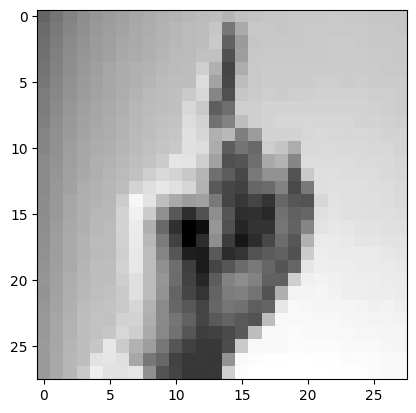

In [11]:
# Function to display a sample image to visually verify the reshaping

def display_sample_image(image):
	plt.imshow(image.reshape(28, 28), cmap='gray')
	plt.show()


# Display the first image in the training set to visually verify the reshaping
display_sample_image(X_train[0])


In [12]:
# One-hot encode labels
# Initialize the OneHotEncoder with sparse_output=False to get dense arrays

encoder = OneHotEncoder(sparse_output=False)


# Reshape y_train and y_test to 2D arrays as required by OneHotEncoder

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Fit the encoder on training labels and transform them to one-hot encoded format
y_train = encoder.fit_transform(y_train.reshape(-1, 1))


# Fit the encoder on test labels and transform them to one-hot encoded format
y_test = encoder.transform(y_test.reshape(-1, 1))



Shape of y_train after one-hot encoding: (27455, 24)
Shape of y_test after one-hot encoding: (7172, 24)
First 5 rows of y_train after one-hot encoding:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


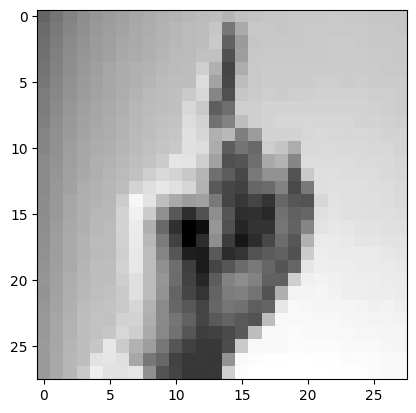

In [13]:
# Check the shape of the encoded labels
print("Shape of y_train after one-hot encoding:", y_train.shape)
print("Shape of y_test after one-hot encoding:", y_test.shape)


# Display first 5 rows of the encoded labels to verify
print("First 5 rows of y_train after one-hot encoding:")
print(y_train[:5])


# Display the first image in the training set to visually verify the reshaping
display_sample_image(X_train[0])

In [14]:
# Print the shapes of the training and testing sets

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Print some sample values from the training set to verify OneHotEncoding
print("Sample y_train (first 5 samples):", y_train[:5])

y_train shape: (27455, 24)
y_test shape: (7172, 24)
Sample y_train (first 5 samples): [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


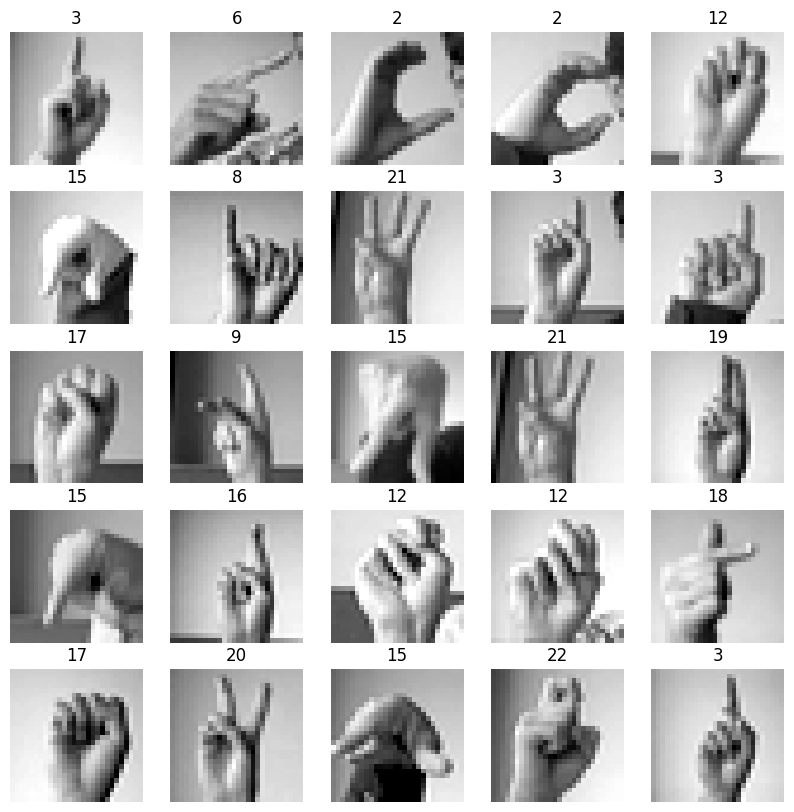

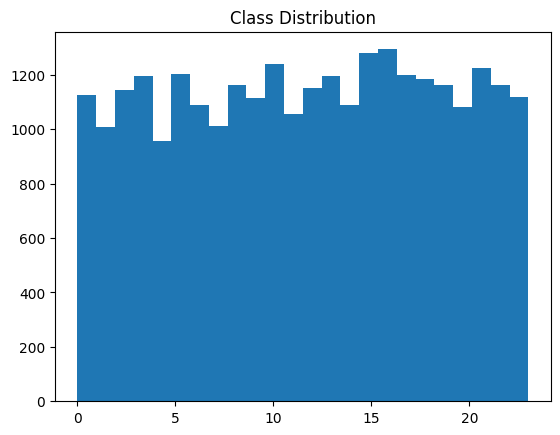

In [15]:
# Exploratory Data Analysis(EDA)


# Plot sample images from the training set
plt.figure(figsize=(10, 10))                                    # Set up a image with 10x10 inch size
for i in range(25):
    plt.subplot(5, 5, i+1)                                      # create a 5x5 grid of subplots
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')         # Display image in grayscale
    plt.title(np.argmax(y_train[i]))                            # Set the title to the image's label
    plt.axis('off')                                             # turned of the axis for cleaner look
plt.show()                                                      # Show the plot with all the subplots



# Class distribution
plt.hist(np.argmax(y_train, axis=1), bins=24)                   # Histogram of class distribution
plt.title('Class Distribution')                                 # Title for the histogram
plt.show()                                                      # Display the histogram

In [16]:
# Model Developement

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten





# Build ANN model
ann_model = Sequential([
    Input(shape=(28, 28, 1)),                  # Input layer with shape 28x28x1 (grayscale images)
    Flatten(),                                 # Flatten layer to convert 2D matrix to 1D vector
    Dense(128, activation='relu'),             # First dense layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),              # Second dense layer with 64 neurons and ReLU activation
    Dense(24, activation='softmax')            # Third dense layer with 24 neurons(for 24 classes) and Softmax activation
])






 # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy as the metric
 
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Model training


# Train the model with the training data
# X_train: Features of the training data
# y_train: Labels of the training data
# epochs: Number of times the model will pass through the entire training data
# validation_split: Percentage of training data reserved for validation
# batch_size: Number of samples per gradient update


history_ann = ann_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2252 - loss: 2.6075 - val_accuracy: 0.5789 - val_loss: 1.3885
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5822 - loss: 1.3230 - val_accuracy: 0.6939 - val_loss: 0.9905
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6913 - loss: 0.9544 - val_accuracy: 0.7541 - val_loss: 0.7402
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7618 - loss: 0.7470 - val_accuracy: 0.8294 - val_loss: 0.5540
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8186 - loss: 0.5705 - val_accuracy: 0.8259 - val_loss: 0.5282
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8665 - loss: 0.4442 - val_accuracy: 0.8905 - val_loss: 0.3527
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.3670 - val_accuracy: 0.8907 - val_loss: 0.3282
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.2809 - val_accuracy: 0.

In [18]:
# Model evaluation


# Evaluate the model's performance on the test data
# X_test: Features of the test data
# y_test: Labels of the test data


ann_test_loss, ann_test_acc = ann_model.evaluate(X_test, y_test)


# Print the accuracy of the model on the test data
print(f'ANN Test accuracy: {ann_test_acc:.4f}, ANN Test Loss: {ann_test_loss:.4f}')                # Display accuracy rounded to four decimal places

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7031 - loss: 1.1366
ANN Test accuracy: 0.7047, ANN Test Loss: 1.1319


In [19]:
# Predictions
# Use the trained model to make predictions on the test data

y_pred =ann_model.predict(X_test)


# Convert predicted probabilities to class labels

y_pred_classes = np.argmax(y_pred, axis=1)


# Convert one-hot encoded true labels to class labels

y_true = np.argmax(y_test, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
# confusion matrices

from sklearn.metrics import classification_report, confusion_matrix



# Print detailed classification report

print(classification_report(y_true, y_pred_classes))


# Print confusion matrix
print(confusion_matrix(y_true, y_pred_classes))      


# confusion_matrix gives us a summary of correct and incorrect predictions, where rows represent actual classes and columns represent predicted classes.

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       331
           1       0.97      0.75      0.84       432
           2       0.74      0.94      0.83       310
           3       0.88      0.80      0.84       245
           4       0.79      0.87      0.83       498
           5       0.71      0.82      0.76       247
           6       0.75      0.66      0.70       348
           7       0.81      0.90      0.85       436
           8       0.71      0.79      0.75       288
           9       0.59      0.57      0.58       331
          10       0.98      0.60      0.75       209
          11       0.88      0.40      0.55       394
          12       0.51      0.58      0.54       291
          13       0.82      0.53      0.64       246
          14       0.96      0.94      0.95       347
          15       0.66      0.80      0.72       164
          16       0.41      0.31      0.35       144
          17       0.32    

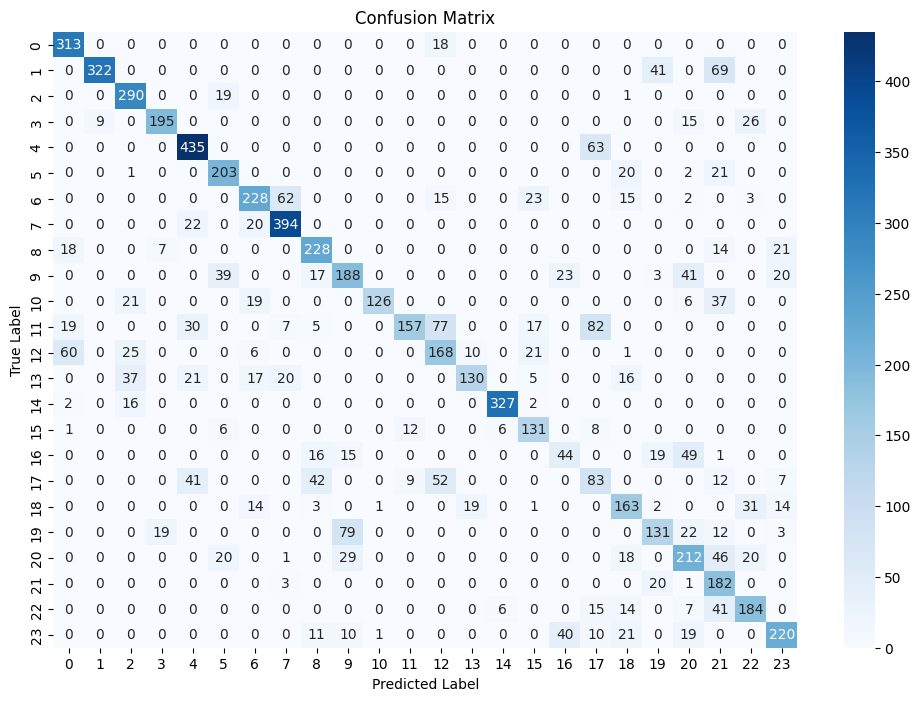

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(24), yticklabels=range(24))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Data Augmentation and Training

# Define the data augentation parameters

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=5,               # Randomly rotate images by up to 5 degrees
    width_shift_range=0.05,         # Randomly shift images horizontally by up to 5%
    height_shift_range=0.05,        # Randomly shift images vertically by up to 5%
    shear_range=0.1,                # Apply random shearing transformations
    zoom_range=0.1,                 # Apply random zooming
    horizontal_flip=False           # No horizontal flipping
)


# Fit the data generator to the training set
datagen.fit(X_train)


# Train the model with augmented data
history = ann_model.fit(datagen.flow(X_train, y_train, batch_size=32),      # Flow augmented images from the data generator
						epochs=10,                                          # Number of epochs to train the model
						validation_data=(X_test, y_test))                   # Validation data for monitoring performance


Epoch 1/10
  6/858 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8065 - loss: 0.6444

d:\my project\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6866 - loss: 1.0367 - val_accuracy: 0.7107 - val_loss: 0.9694
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7569 - loss: 0.7636 - val_accuracy: 0.7447 - val_loss: 0.7839
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7812 - loss: 0.6833 - val_accuracy: 0.7779 - val_loss: 0.6916
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7998 - loss: 0.6149 - val_accuracy: 0.7885 - val_loss: 0.6768
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8201 - loss: 0.5510 - val_accuracy: 0.7904 - val_loss: 0.7320
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8358 - loss: 0.5061 - val_accuracy: 0.7794 - val_loss: 0.6935
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8401 - loss: 0.4888 - val_accuracy: 0.8067 - val_loss: 0.5752
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8552 - loss: 0.4355 - val_accuracy: 0.8257 - va

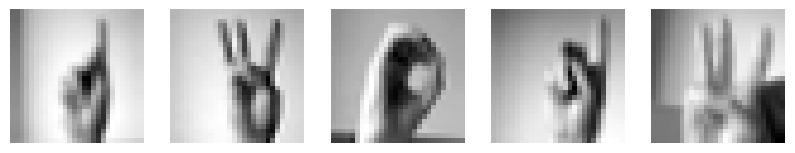

In [24]:
# Visualize some augmented images
import matplotlib.pyplot as plt



# Generate a batch of images
augmented_images, _ = next(datagen.flow(X_train, y_train, batch_size=5))



# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)        # Create a subplot for each image
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')    # Display the image
    plt.axis('off')                 # Turn off axis     
plt.show()

In [25]:
# Model Evaluation After Augmentation


# Re-evaluate the model's performance on the test data
ann_test_loss_aug, ann_test_acc_aug = ann_model.evaluate(X_test, y_test)

# Print the accuracy of the model on the test data after augmentation
print(f'ANN Test accuracy after augmentation: {ann_test_acc_aug:.4f}, ANN Test Loss after augmentation: {ann_test_loss_aug:.4f}')


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8331 - loss: 0.5459
ANN Test accuracy after augmentation: 0.8364, ANN Test Loss after augmentation: 0.5324


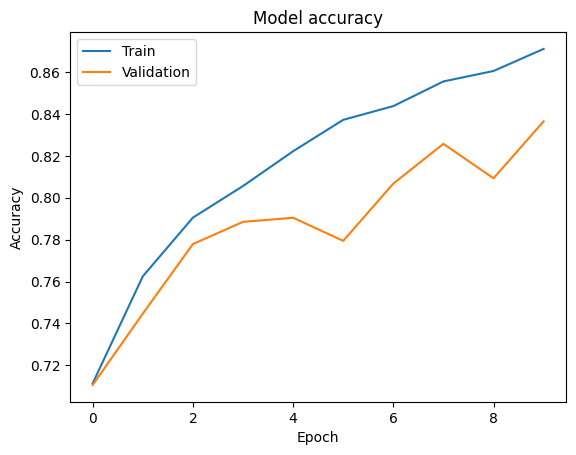

In [26]:
# Plotting Training and Validation Accuracy




import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])                         # Plot training accuracy
plt.plot(history.history['val_accuracy'])                     # Plot validation accuracy
plt.title('Model accuracy')                                   # Title of the plot
plt.xlabel('Epoch')                                           # X-axis label
plt.ylabel('Accuracy')                                        # Y-axis label
plt.legend(['Train', 'Validation'], loc='upper left')         # Add a legend to the plot   
plt.show()

In [27]:
# CNN Model Development and Training

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),    # First convolutional layer with 32 filters, 3x3 kernel, and ReLU a
    BatchNormalization(),               # Normalize activations of previous layer
    MaxPooling2D((2, 2)),               # Apply 2x2 max pooling
    Dropout(0.25),                      # Dropout layer with a rate of 25%


    Conv2D(64, (3, 3), activation='relu'),     # Second convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    BatchNormalization(),                      # Normalize activations of previous layer
    MaxPooling2D((2, 2)),                      # Apply 2x2 max pooling
    Dropout(0.25),                             # Dropout layer with a rate of 25%
    

    Conv2D(128, (3, 3), activation='relu'),      # Third convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
    BatchNormalization(),                        # Normalize activations of previous layer
    MaxPooling2D((2, 2)),                        # Apply 2x2 max pooling
    Dropout(0.25),                               # Dropout layer with a rate of 25%
    

    Flatten(),       # Flatten the 3D output to 1D
    Dense(128, activation='relu'),      # Fully connected layer with 128 neurons and ReLU activation
    BatchNormalization(),               # Normalize activations of previous layer
    Dropout(0.5),                       # Dropout layer with a rate of 50%
    Dense(24, activation='softmax')     # Output layer with 24 neurons for classification with softmax activation
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


d:\my project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Split the training data into training and validation sets


from sklearn.model_selection import train_test_split

# Assuming you already have X_train and y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [29]:
# Hyperparameter tuning using Learning Rate Scheduler

from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3            # Initial learning rate
    if epoch > 10:
        lr *= 0.5        # Reduce learning rate after 10 epochs
    if epoch > 20:
        lr *= 0.5        # Further reduce learning rate after 20 epochs

    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)        # Learning rate scheduler callback

history = cnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[lr_scheduler])



Epoch 1/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.3131 - loss: 2.5291 - val_accuracy: 0.7474 - val_loss: 0.8324 - learning_rate: 0.0010
Epoch 2/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.8086 - loss: 0.5887 - val_accuracy: 0.9920 - val_loss: 0.0741 - learning_rate: 0.0010
Epoch 3/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9128 - loss: 0.2674 - val_accuracy: 0.9956 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 4/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9561 - loss: 0.1531 - val_accuracy: 0.9843 - val_loss: 0.0554 - learning_rate: 0.0010
Epoch 5/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9717 - loss: 0.0977 - val_accuracy: 0.9587 - val_loss: 0.1344 - learning_rate: 0.0010
Epoch 6/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9716 - loss: 0.0912 - val_accuracy: 0.9836 - val_loss: 0.0595 - learning_rate: 0.0010
Epoch 7/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9795 - l

In [30]:
# Evaluate the CNN model on the test data

cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {cnn_test_accuracy:.4f}, CNN Test loss: {cnn_test_loss:.4f}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9599 - loss: 0.1275
CNN Test accuracy: 0.9596, CNN Test loss: 0.1287


In [31]:
# Evaluate the performance of the ANN model on the test data

ann_test_loss, ann_test_accuracy = ann_model.evaluate(X_test, y_test)
print(f'ANN Test Accuracy: {ann_test_accuracy:.4f}, ANN Test Loss: {ann_test_loss:.4f}')



# Evaluate CNN model on the test data
cnn_test_loss, cnn_test_accuracy =cnn_model.evaluate(X_test, y_test)
print(f'CNN Test Accuracy: {cnn_test_accuracy:.4f}, CNN Test Loss: {cnn_test_loss:.4f}')


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8331 - loss: 0.5459
ANN Test Accuracy: 0.8364, ANN Test Loss: 0.5324
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9599 - loss: 0.1275
CNN Test Accuracy: 0.9596, CNN Test Loss: 0.1287


In [32]:
# Save the CNN model
cnn_model.save('best_cnn_model.h5')


In [33]:
# Data augmentation for improving the model



datagen = ImageDataGenerator(
    rotation_range=10,        # Increase rotation range
    width_shift_range=0.1,    # Increase width shift range
    height_shift_range=0.1,   # Increase height shift range
    shear_range=0.2,          # Increase shear range
    zoom_range=0.2,           # Increase zoom range
    horizontal_flip=True,     # Allow horizontal flip
    fill_mode='nearest'       # Fill mode for new pixels
)

datagen.fit(X_train)

history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=64),
						 epochs=30,       # Number of epochs
						   validation_data=(X_val, y_val))    #  Validation data


Epoch 1/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.5245 - loss: 3.2627 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.6272 - loss: 1.4993 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.6750 - loss: 1.1459 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7047 - loss: 1.0126 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.7159 - loss: 0.9228 - val_accuracy: 0.9996 - val_loss: 0.0040
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7309 - loss: 0.8620 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.7508 - loss: 0.7807 - val_accuracy: 0.9998 - val_loss: 0.0050
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7615 - loss: 0.7519 - 

In [34]:
# Fine tuning the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define a more complex CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),    # First Conv Layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),     # Second Conv Layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),    # Third Conv Layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),    # Fourth Conv Layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='softmax')         # Output layer with 24 classes
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [35]:
from tensorflow.keras.callbacks import LearningRateScheduler


# Learning Rate Scheduler


def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.5
    if epoch > 20:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)



# Evaluate the model on the test data
cnn_test_loss, cnn_test_accuracy = model.evaluate(X_test, y_test)
print(f'CNN Test Accuracy: {cnn_test_accuracy:.4f}, CNN Test Loss: {cnn_test_loss:.4f}')


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0246 - loss: 3.1812
CNN Test Accuracy: 0.0258, CNN Test Loss: 3.1813


In [36]:
# Generate predictions and evaluate performance

from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.00      0.00      0.00       432
           2       0.00      0.00      0.00       310
           3       0.00      0.00      0.00       245
           4       0.00      0.00      0.00       498
           5       0.00      0.00      0.00       247
           6       0.00      0.00      0.00       348
           7       0.00      0.00      0.00       436
           8       0.00      0.00      0.00       288
           9       0.00      0.00      0.00       331
          10       0.00      0.00      0.00       209
          11       0.00      0.00      0.00       394
          12       0.00      0.00      0.00       291
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       347
          15       0.03      0.75      0.05       164
          16       0.00      0.00      

d:\my project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\my project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\my project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


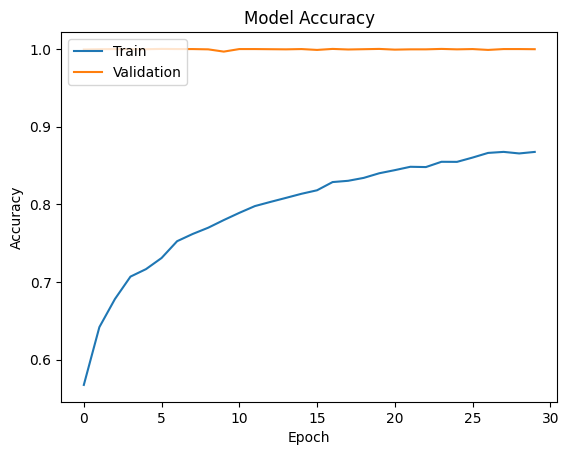

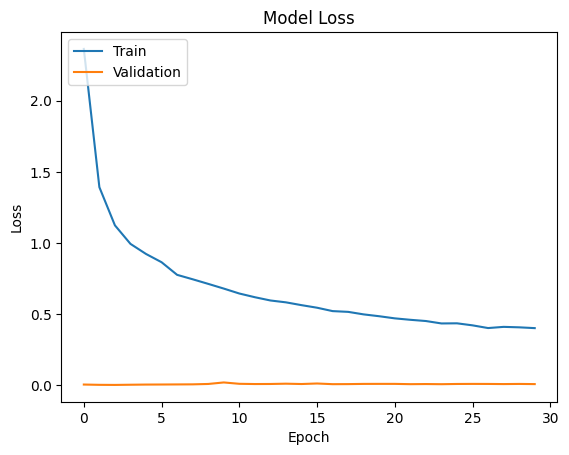

In [37]:
# Visualize the results

import matplotlib.pyplot as plt

# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
# =========================================================
# Model Evaluation on MNIST Dataset
# =========================================================

# The following code is used to evaluate the performance of the model on a well-known dataset, MNIST,
# to benchmark and compare its performance. MNIST is a standard dataset in the field of machine learning,
# providing a baseline for evaluating models. This helps in understanding the model's generalization
# capabilities and comparing its performance with other models or methods tested on MNIST.


import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score



# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255




# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



# Define the model creation function
def create_model():
    ## Creating a simple feedforward neural network for classification
    model = Sequential([
        Dense(128, activation='relu', input_shape=(28 * 28,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')  # 10 classes for MNIST digits 0-9
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model



# Define a function to evaluate a model
def evaluate_model(model, x_train, y_train, x_val, y_val):
    # Train the model and evaluate its performance on validation data
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(x_val, y_val))
    y_pred = model.predict(x_val)
    y_pred = np.argmax(y_pred, axis=1)
    y_val = np.argmax(y_val, axis=1)
    return accuracy_score(y_val, y_pred)




# Perform K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []



for train_index, val_index in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = create_model()
    score = evaluate_model(model, x_train_fold, y_train_fold, x_val_fold, y_val_fold)
    scores.append(score)



print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))



# The results from the MNIST evaluation help benchmark the model and validate its performance,
# providing insights into its generalization capabilities. This process also serves as a
# comparison point for evaluating the model's performance on other datasets, such as the sign language dataset.

d:\my project\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


d:\my project\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


d:\my project\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step


d:\my project\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step


d:\my project\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cross-validation scores: [0.9783333333333334, 0.9754166666666667, 0.9738333333333333, 0.9756666666666667, 0.9763333333333334]
Average cross-validation score: 0.9759166666666668


In [39]:
# =========================================================
# Evaluate the saved model on the test set 
#=========================================================

# Evaluate the saved model using the test dataset
 
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9729 - loss: 0.1034
Test Accuracy: 0.9769, Test Loss: 0.0829


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 972    1    0    0    0    1    2    2    2    0]
 [   1 1123    2    1    0    1    2    0    5    0]
 [   3    0 1008    3    2    0    2    7    7    0]
 [   0    0    6  979    0   14    0   

In [41]:
# =========================================================
# Testing Additional Code and Data Processing
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Reshape and normalize the data channel dimension and normalize pixel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255


# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [42]:
from tensorflow.keras.models import Sequential

# Define a more complex CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

d:\my project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.5
    if epoch > 20:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=30, validation_data=(x_test, y_test), callbacks=[lr_scheduler])

Epoch 1/30
  1/938 ━━━━━━━━━━━━━━━━━━━━ 1:08:50 4s/step - accuracy: 0.0625 - loss: 4.3278

d:\my project\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 109ms/step - accuracy: 0.6158 - loss: 1.2541 - val_accuracy: 0.9639 - val_loss: 0.1101 - learning_rate: 0.0010
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.9148 - loss: 0.2698 - val_accuracy: 0.9753 - val_loss: 0.0768 - learning_rate: 0.0010
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9414 - loss: 0.1949 - val_accuracy: 0.9817 - val_loss: 0.0512 - learning_rate: 0.0010
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9483 - loss: 0.1692 - val_accuracy: 0.9798 - val_loss: 0.0594 - learning_rate: 0.0010
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9559 - loss: 0.1438 - val_accuracy: 0.9822 - val_loss: 0.0505 - learning_rate: 0.0010
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9583 - loss: 0.1339 - val_accuracy: 0.9842 - val_loss: 0.0456 - learning_rate: 0.0010
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.9601 - loss: 0.13

In [44]:
# Evaluate the model

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')



# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)



# Classification report
print(classification_report(y_true, y_pred_classes))



# Confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9888 - loss: 0.0366
Test Accuracy: 0.9915, Test Loss: 0.0264
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1127    2    0    0   

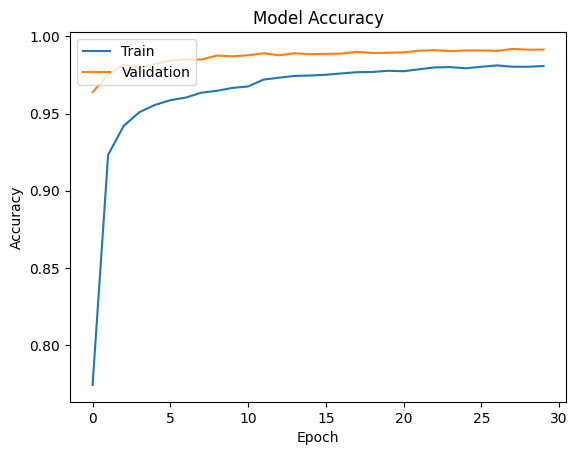

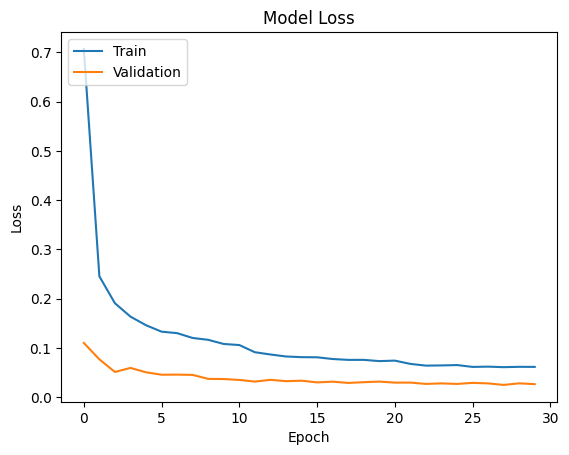

In [45]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

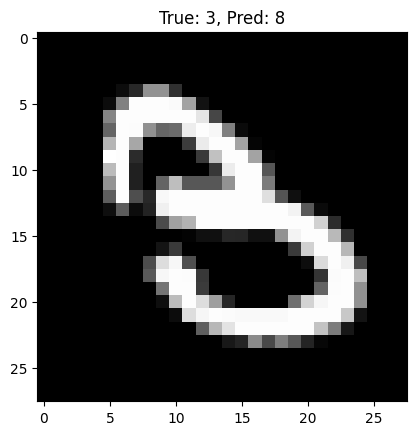

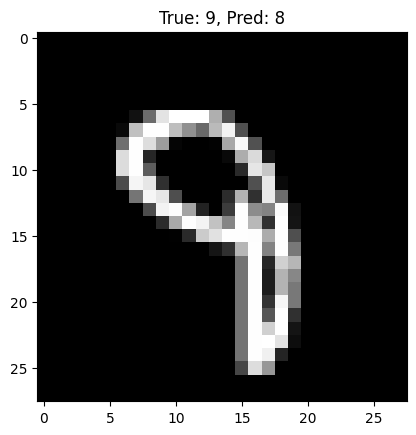

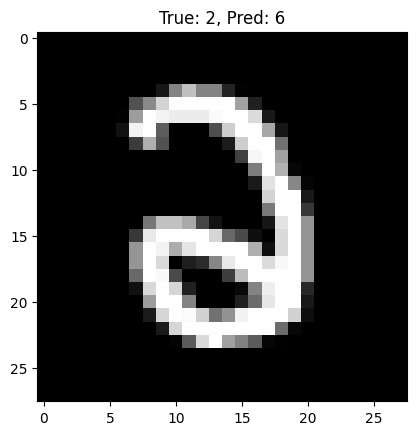

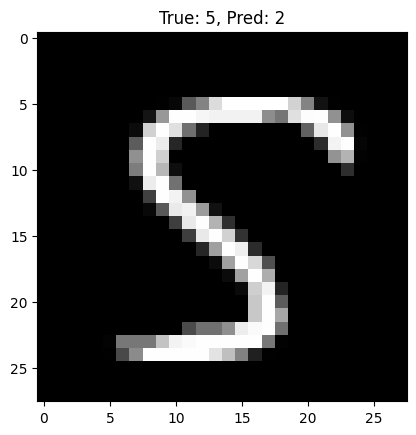

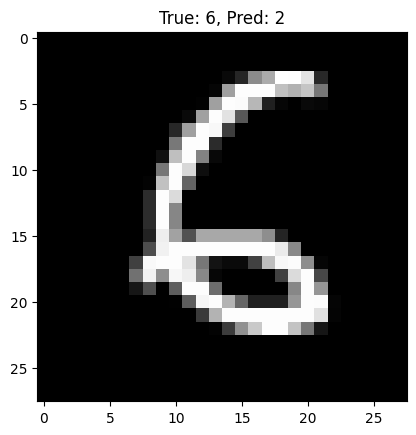

In [46]:
import matplotlib.pyplot as plt
import numpy as np



# Identify misclassified images
incorrect_indices = np.where(y_pred_classes != y_true)[0]



# Plot some misclassified images
for i in range(5):
    plt.imshow(x_test[incorrect_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[incorrect_indices[i]]}, Pred: {y_pred_classes[incorrect_indices[i]]}')
    plt.show()




model.save('final_mnist_model.h5')

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



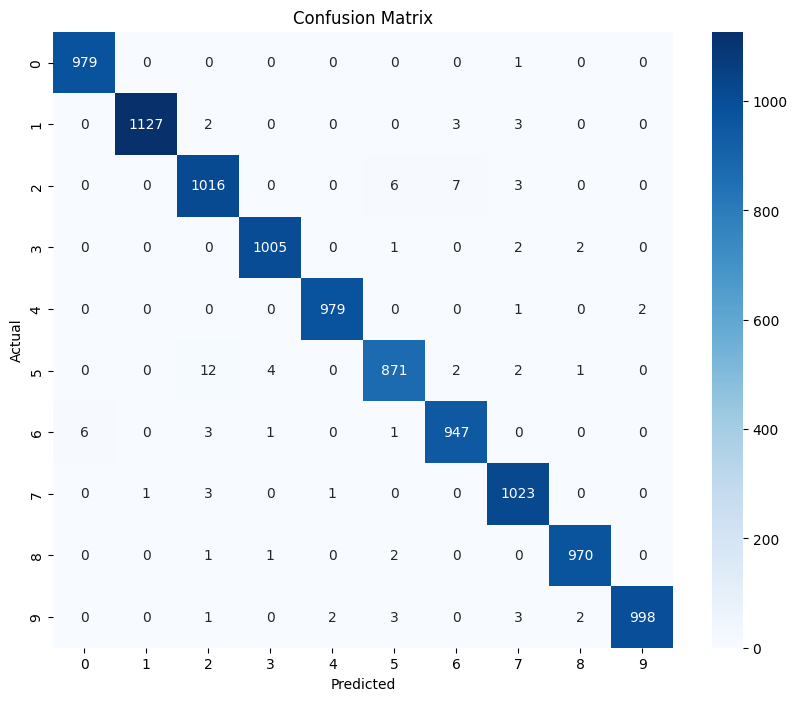

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix



# Assuming y_true and y_pred_classes are already defined
# Example:
# y_true = np.argmax(y_test, axis=1)
# y_pred_classes = np.argmax(model.predict(X_test), axis=1)



# Classification report

report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)



# Confusion matrix

cm = confusion_matrix(y_true, y_pred_classes)




# Plot confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
# PROJECT REPORT

In [48]:
# Sign Language Detection Using Neural Networks

## Introduction

'''This project aims to develop a machine learning model capable of detecting American Sign Language (ASL) letters from images.

 The main objective is to build a classifier that can accurately identify the ASL letters represented by hand gestures in images. 

 We will explore different models, including Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN), to achieve this goal.'''



## Data Description

'''The dataset used for this project is the American Sign Language (ASL) letters dataset. 

It contains images of hand gestures representing the 24 letters of the ASL alphabet (excluding 'J' and 'Z' due to their dynamic nature).

 The images are grayscale with a resolution of 28x28 pixels. The dataset is divided into training and testing sets.'''


'''  ------->  - **Training set:** Contains images used to train the models.
     ------->   **Testing set:** Contains images used to evaluate the performance of the models.'''



## Data Preprocessing

'''Before training the models, the following preprocessing steps were performed:

1. **Normalization:** The pixel values of the images were normalized to the range [0, 1] by dividing by 255.
2. **Reshaping:** The images were reshaped to the required input shape for the models.
3. **One-Hot Encoding:** The labels were one-hot encoded to match the output layer of the models.
4. **Data Augmentation:** Techniques like rotation, width shift, height shift, shear, zoom, and horizontal flip were applied to the training images to improve the model's generalization ability.'''



## Modeling

'''Two types of neural network models were used for this project: an Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN).'''

### Artificial Neural Network (ANN)

'''The ANN model consisted of fully connected layers with ReLU activation functions and dropout layers for regularization.'''

### Convolutional Neural Network (CNN)

'''The CNN model consisted of multiple convolutional layers followed by max-pooling and dropout layers. 
   Batch normalization was used to improve training stability and performance. 
   The final layers were fully connected with a softmax activation function for classification.'''



## Training and Validation

'''The models were trained using the Adam optimizer and categorical cross-entropy loss. The training data was split into training and validation 
The models were trained for a specified number of epochs, and the learning rate was adjusted using a learning rate scheduler.'''

''' - **Training epochs:** 30

    - **Batch size:** 64

    - **Learning rate scheduler:** The learning rate was reduced by half after 10 and 20 epochs.'''

''' ** Data augmentation was applied during the training process to improve the model's generalization ability.'''





## Results

'''The performance of the models was evaluated using accuracy, loss, precision, recall, and F1-score. The confusion matrix was also used to analyze the model's performance on individual classes.'''

## Artificial Neural Network (ANN)

'''- **Test Accuracy:** 0.7047
- **Test Loss:** 1.1319 '''

### Convolutional Neural Network (CNN)

'''- **Test Accuracy:** 0.9596
- **Test Loss:** 0.1287 '''



### Confusion Matrix of final Model

![Confusion Matrix]("D:\my project\Confusion Matrix Output.png")

### Classification Report of final model

''' precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000'''
  



## Conclusion

''' The Convolutional Neural Network (CNN) outperformed the Artificial Neural Network (ANN) in terms of accuracy and loss. 

The data augmentation techniques and the use of a more complex model architecture contributed to the improved performance. 

The model successfully detects American Sign Language letters from images, and further improvements can be made by experimenting with more advanced techniques such as transfer learning and ensemble methods.

Future work includes expanding the dataset, exploring different architectures, and deploying the model as a web application to make it accessible to a wider audience. '''


'[Confusion' is not recognized as an internal or external command,
operable program or batch file.


' The Convolutional Neural Network (CNN) outperformed the Artificial Neural Network (ANN) in terms of accuracy and loss. \n\nThe data augmentation techniques and the use of a more complex model architecture contributed to the improved performance. \n\nThe model successfully detects American Sign Language letters from images, and further improvements can be made by experimenting with more advanced techniques such as transfer learning and ensemble methods.\n\nFuture work includes expanding the dataset, exploring different architectures, and deploying the model as a web application to make it accessible to a wider audience. '